# Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criação do DataFrame

In [2]:
dadosDataFrame = {
    "País" : ["Austrália", "Canadá", "Dinamarca", "Finlândia", "Grã Bretanha", "Islândia","Holanda", "Noruega", "Suécia", "Suíça"],
    "Consumo de Cigarro per Capita" : [480, 500, 380, 1100, 1100, 230, 490, 250, 300, 510],
    "Mortes por Milhão de Pessoas" : [180, 150, 170, 350, 460, 60, 240, 90, 110, 250]
}

df = pd.DataFrame(dadosDataFrame, index=[i for i in range(1, 11)])

df.index.name = "Índice"

df.head(10)

,País,Consumo de Cigarro per Capita,Mortes por Milhão de Pessoas
Índice,,,
1,Austrália,480,180
2,Canadá,500,150
3,Dinamarca,380,170
4,Finlândia,1100,350
5,Grã Bretanha,1100,460
6,Islândia,230,60
7,Holanda,490,240
8,Noruega,250,90
9,Suécia,300,110


# Espalhamento dos dados no pyplot

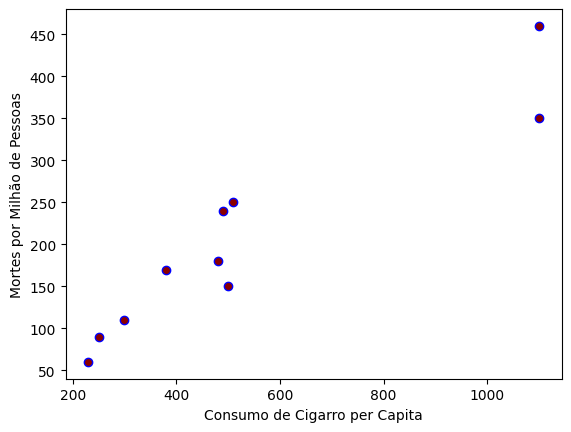

In [3]:
x = "Consumo de Cigarro per Capita"
y = "Mortes por Milhão de Pessoas"

plt.xlabel(x)
plt.ylabel(y)

arrayX = df[x].to_numpy()
arrayX.shape = (len(arrayX), 1)
# print(f'{arrayX = }\n')

arrayY = df[y].to_numpy()
arrayY.shape = (len(arrayY), 1)
# print(f'{arrayY = }\n')

plt.scatter(arrayX, arrayY, color="darkRed", edgecolors='b')

# Concatenando os uns no numpy array do eixo X para possibilitar a estimação do modelo

In [4]:
ones = np.ones((len(arrayX), 1))
# print(ones, end="\n\n")

arrayX = np.concatenate((ones, arrayX),axis=1)
arrayX

array([[1.0e+00, 4.8e+02],
       [1.0e+00, 5.0e+02],
       [1.0e+00, 3.8e+02],
       [1.0e+00, 1.1e+03],
       [1.0e+00, 1.1e+03],
       [1.0e+00, 2.3e+02],
       [1.0e+00, 4.9e+02],
       [1.0e+00, 2.5e+02],
       [1.0e+00, 3.0e+02],
       [1.0e+00, 5.1e+02]])

# Estimação do modelo

In [5]:
modelo = np.linalg.pinv(arrayX.T @ arrayX) @ arrayX.T @ arrayY
modelo

array([[9.13933514],
       [0.36865293]])

# Treinando o modelo para lidar com novos dados

X_new = array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00083403e+00],
       [1.00000000e+00, 2.00166806e+00],
       ...,
       [1.00000000e+00, 1.19799833e+03],
       [1.00000000e+00, 1.19899917e+03],
       [1.00000000e+00, 1.20000000e+03]]) -> (1200, 2)


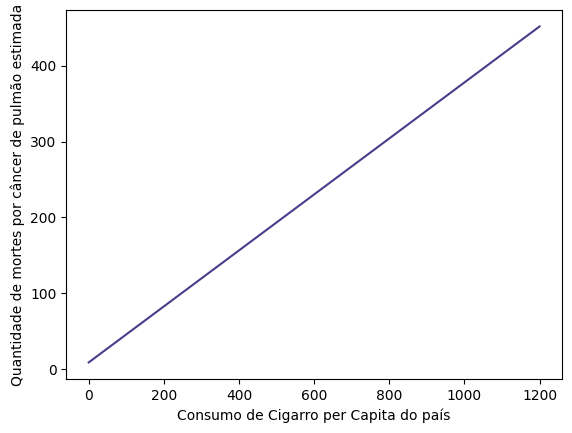

In [7]:
x_axis = np.linspace(0, 1200, 1200)
x_axis.shape = (len(x_axis), 1)
# print(f'{x_axis = } -> {x_axis.shape}\n')

ones = np.ones((len(x_axis), 1))
# print(f'{ones = } -> {ones.shape}\n')

X_new = np.concatenate((ones, x_axis), axis=1)
# print(f'{X_new = } -> {X_new.shape}\n')

Y_pred = X_new @ modelo

plt.plot(x_axis, Y_pred, color='darkSlateBlue')
plt.xlabel("Consumo de Cigarro per Capita do país")
plt.ylabel("Quantidade de mortes por câncer de pulmão estimada")
plt.show()